<a href="https://colab.research.google.com/github/JSEFERINO/JSEFERINO/blob/main/DOEJH2Cipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.11 <span style="color:blue"> **Tema 1: Diseños Completos Aleatorizados - DCA usando Python**</span>

### <span style="color:green"> **Ejemplo 2.3. (Texto Analisis y Diseno de Experimentos_Humberto-Roman_2da Ed_McGrawHill, pág. 63)**</span>
### <span style="color:blue"> **Problema: _Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva. La suela de los zapatos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérrdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independiente de las demás. Los datos (en mg) sobre el desgaste de cada tipo de cuero se muestran en la tabla siguiente:_.**</span>

### <span style="color:blue">**Tabla de datos**</span>


|Tipos de Cuero|||Desgaste||||
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|A|264|260| 258| 241| 262| 255|
|B|208| 220| 216| 200| 213| 206|
|C|220|263| 219| 225| 230| 228|
|D|217| 226| 215|224| 220| 222|

# **Importando la libreria necesaria**

In [ ]:
import pandas as pd

# **Escribimos los datos en Python y definimos el DataFrame**

In [ ]:
datos = [[264, 208, 220, 217],
         [260, 220, 263, 226],
         [258, 216, 219, 215], 
         [241, 200, 225, 224], 
         [262, 213, 230, 220], 
         [255, 206, 228, 222]]

columnas = ['A', 'B', 'C', 'D'] # definimos los nombres de las columnas
filas = ['F1', 'F2', 'F3', 'F4', 'F5', 'F5'] # definimos los nombres de las filas

df = pd.DataFrame(datos, columns=columnas, index=filas)


# **Verificando que los datos coiciden con la tabla**

In [ ]:
print(df)

      A    B    C    D
F1  264  208  220  217
F2  260  220  263  226
F3  258  216  219  215
F4  241  200  225  224
F5  262  213  230  220
F5  255  206  228  222


# **Organizando adecuadamente la Tabla**

In [ ]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'desgaste']
print(df_melt)


   index treatments  desgaste
0     F1          A       264
1     F2          A       260
2     F3          A       258
3     F4          A       241
4     F5          A       262
5     F5          A       255
6     F1          B       208
7     F2          B       220
8     F3          B       216
9     F4          B       200
10    F5          B       213
11    F5          B       206
12    F1          C       220
13    F2          C       263
14    F3          C       219
15    F4          C       225
16    F5          C       230
17    F5          C       228
18    F1          D       217
19    F2          D       226
20    F3          D       215
21    F4          D       224
22    F5          D       220
23    F5          D       222


# **Más librerias a utilizar**

In [ ]:
import matplotlib.colors as mcolors

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

# **Generemos los boxplot para el desgaste con los diferentes tipos de cuero**

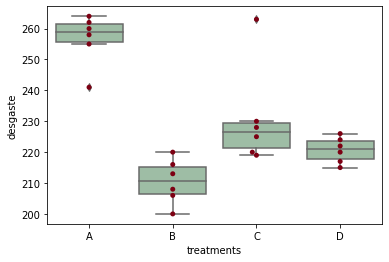

In [ ]:

ax = sns.boxplot(x='treatments', y='desgaste', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="desgaste", data=df_melt, color='#7d0013')
plt.show()

# **Las funciones _stats f_oneway_ toman los grupos como entrada y devuelven el valor ANOVA F y p**

In [ ]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)

23.237500684518945 1.0017956916161987e-06


# **Obtener la tabla ANOVA como R como salida**

In [ ]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

# **Modelo de mínimos cuadrados ordinarios (OLS)**

In [ ]:
model = ols('desgaste ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,395266.666667,1.0,3896.172170,2.131530e-24
C(treatments),7072.333333,3.0,23.237501,1.001796e-06
Residual,2029.000000,20.0,NaN,NaN


# **Interpretación** 
## *El valor de p obtenido del análisis ANOVA es significativo ( p < 0.05), por lo que concluimos que existen diferencias significativas entre tratamientos.*

## *Nota sobre el valor F : el valor F está inversamente relacionado con el valor p y un valor F más alto (mayor que el valor crítico F ) indica un valor p significativo.*

# **Mas librerías para obtener otro Anova**

In [ ]:
!pip install bioinfokit

In [ ]:
from bioinfokit.analys import stat

In [ ]:
res = stat()
res.anova_stat(df=df_melt, res_var='desgaste', anova_model='desgaste ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,7072.333333,2357.444444,23.237501,0.000001
Residual,20.0,2029.000000,101.450000,NaN,NaN


## *Nota : cuando el ANOVA es significativo, se utilizan pruebas post hoc para ver las diferencias entre grupos específicos. Las pruebas post hoc controlan la tasa de error familiar (tasa de error de tipo I inflada) debido a comparaciones múltiples. las pruebas post hoc ajustan los valores de p (corrección de Bonferroni) o valor crítico (prueba HSD de Tukey).*

# **Realizar una comparación múltiple por pares (HSD de Tukey)**
## *Para datos de tamaño de muestra desiguales, tukey_hsd usa la prueba de Tukey-Kramer*
### **Valor p < 5% indica que hay diferencias entre los tipos de cuero en cuanto a su desgaste medio**

In [ ]:
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=df_melt, res_var='desgaste', xfac_var='treatments', anova_model='desgaste ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,46.166667,29.889544,62.443790,11.227372,0.001000
1,A,C,25.833333,9.556210,42.110456,6.282465,0.001322
2,A,D,36.000000,19.722877,52.277123,8.754918,0.001000
3,B,C,20.333333,4.056210,36.610456,4.944908,0.011221
4,B,D,10.166667,-6.110456,26.443790,2.472454,0.326394
5,C,D,10.166667,-6.110456,26.443790,2.472454,0.326394


# **Pruebe los supuestos de ANOVA Enlace permanente**
### Las suposiciones de ANOVA se pueden verificar utilizando estadísticas de prueba (p. ej., Shapiro-Wilk, Bartlett, prueba de Levene, prueba de Brown-Forsythe ) y enfoques visuales como gráficas residuales (p. ej., QQ-plots) e histogramas.
### Los enfoques visuales funcionan mejor que las pruebas estadísticas. Por ejemplo, la prueba de Shapiro-Wilk tiene poca potencia para datos de tamaño de muestra pequeños y se desvía significativamente de la normalidad para tamaños de muestra grandes (por ejemplo, n > 50). Para tamaños de muestra grandes, debe considerar usar QQ-plot para la suposición de normalidad.
### Ahora, generaré un gráfico QQ a partir de residuos estandarizados (los valores atípicos se pueden detectar fácilmente a partir de residuos estandarizados que los residuos normales)

# **Normalidad: QQ-plot**
## res.anova_std_residuals son residuos estandarizados obtenidos de ANOVA (ver arriba)
## Si los datos en un alto porcentaje tienden alinearse a la recta significa que no se puede rechazar la normalidad de los mismos

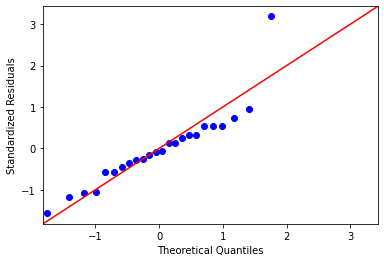

In [ ]:

import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# **Normalidad: Histograma**

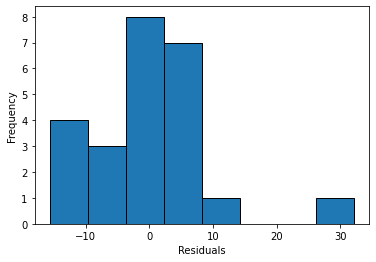

In [ ]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

# **La prueba de Shapiro-Wilk** se puede utilizar para comprobar la distribución normal de los residuos . Hipótesis nula : los datos se extraen de la distribución normal.

In [ ]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.8781194686889648 0.0076182521879673


# **Supuesto de Homocedasticidad** Como los datos se extraen de la distribución normal, use la prueba de **Bartlett** para verificar la homogeneidad de las varianzas . Hipótesis nula : las muestras de las poblaciones tienen varianzas iguales.

In [ ]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'])
print(w, pvalue)

8.478308400452736 0.0370947235097545


# **Otra forma para realizar la prueba de Bartlet**

In [ ]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='desgaste', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),8.4783
1,Degrees of freedom (Df),3.0000
2,p value,0.0371


# **Homocedasticidad con la prueba de Levene** se puede utilizar para verificar la homogeneidad de las varianzas cuando los datos no se extraen de la distribución normal.

# si tiene una tabla apilada, puede usar bioinfokit opara la prueba de Levene

In [ ]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='desgaste', xfac_var='treatments')
res.levene_summary
# output

,Parameter,Value
0,Test statistics (W),0.6655
1,Degrees of freedom (Df),3.0000
2,p value,0.5830
